# Homework 4

In [1]:
import numpy as np

import sympy
from sympy import simplify, Function
from sympy import symbols, pprint
from sympy import sin, cos, asin, acos, pi, Abs
from sympy import Matrix, diff
from sympy import lambdify
from sympy import solve
from sympy import re, im
from sympy import Eq
from sympy import solveset
from sympy import det

from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
plt.ion()

## Question 1.1

In [2]:
(t,
 x_1, 
 x_2,
 x_3,
 x_4,
 I,
 Gamma,
 k,
 T,
 r_3,
 kappa,
 mu) = symbols("""t,
                x_1, 
                x_2,
                x_3,
                x_4,
                I,
                Gamma,
                k,
                T,
                r_3,
                kappa,
                mu""" , real = True)

In [3]:
x_1 = Function('x_1', real=True)(t)
x_2 = Function('x_2', real=True)(t)
x_3 = Function('x_3', real=True)(t)
x_4 = Function('x_4', real=True)(t)

In [4]:
state = Matrix([[x_1, x_2, x_3, x_4]]).T
display(state)

Matrix([
[x_1(t)],
[x_2(t)],
[x_3(t)],
[x_4(t)]])

In [5]:
g = simplify(Matrix([[x_2, 1 / I * (x_3 / T - Gamma * x_2 ** 2 + k * x_1 / T ** 2), x_4, -r_3 * (1 + kappa) * x_4 - kappa * r_3 ** 2 * x_3 - mu * kappa * r_3 ** 2 * x_2]]).T)
display(g)

Matrix([
[                                                            x_2(t)],
[            (-Gamma*T**2*x_2(t)**2 + T*x_3(t) + k*x_1(t))/(I*T**2)],
[                                                            x_4(t)],
[r_3*(-kappa*mu*r_3*x_2(t) - kappa*r_3*x_3(t) - (kappa + 1)*x_4(t))]])

## Question 1.2

In [6]:
fixed_points = solve(g, state)
display(fixed_points)

[(0, 0, 0, 0)]

## Question 1.3

In [7]:
jacobian = g.jacobian(state)
display(jacobian)

Matrix([
[         0,                 1,             0,                0],
[k/(I*T**2), -2*Gamma*x_2(t)/I,       1/(I*T),                0],
[         0,                 0,             0,                1],
[         0,  -kappa*mu*r_3**2, -kappa*r_3**2, r_3*(-kappa - 1)]])

In [8]:
A = jacobian.subs([(x_1, 0), (x_2, 0), (x_3, 0), (x_4, 0)])
display(A)
display(simplify(A @ state))

Matrix([
[         0,                1,             0,                0],
[k/(I*T**2),                0,       1/(I*T),                0],
[         0,                0,             0,                1],
[         0, -kappa*mu*r_3**2, -kappa*r_3**2, r_3*(-kappa - 1)]])

Matrix([
[                                                            x_2(t)],
[                                    (T*x_3(t) + k*x_1(t))/(I*T**2)],
[                                                            x_4(t)],
[r_3*(-kappa*mu*r_3*x_2(t) - kappa*r_3*x_3(t) - (kappa + 1)*x_4(t))]])

## Question 1.4

In [9]:
char_eq = A.charpoly().as_expr()
display(char_eq)

lambda**4 + lambda**3*(kappa*r_3 + r_3) - k*kappa*r_3**2/(I*T**2) + lambda**2*(I*T**2*kappa*r_3**2 - k)/(I*T**2) + lambda*(T*kappa*mu*r_3**2 - k*kappa*r_3 - k*r_3)/(I*T**2)

## Question 1.5

In [10]:
(omega) = symbols("""omega""" , real = True)

In [11]:
char_eq.subs([('lambda', sympy.I * omega)])

omega**4 - I*omega**3*(kappa*r_3 + r_3) - k*kappa*r_3**2/(I*T**2) - omega**2*(I*T**2*kappa*r_3**2 - k)/(I*T**2) + I*omega*(T*kappa*mu*r_3**2 - k*kappa*r_3 - k*r_3)/(I*T**2)

In [12]:
real_eq = re(char_eq.subs([('lambda', sympy.I * omega)]))
im_eq = im(char_eq.subs([('lambda', sympy.I * omega)]))

display(real_eq)
display(im_eq)

omega**4 - k*kappa*r_3**2/(I*T**2) - omega**2*(I*T**2*kappa*r_3**2 - k)/(I*T**2)

-omega**3*(kappa*r_3 + r_3) + omega*(T*kappa*mu*r_3**2 - k*kappa*r_3 - k*r_3)/(I*T**2)

## Question 1.6

In [13]:
def mu_function(r_3):
    omega = 1
    kappa = 1
    k = 1
    I = 1
    T = 1
    return (omega**2 * I * T**2 * (kappa*r_3 + r_3) + k*kappa*r_3 + r_3) / (T * kappa * r_3**2)

def r3_function(r_3):
    omega = 1
    kappa = 1
    k = 1
    I = 1
    T = 1
    return np.sqrt((omega**4 * I * T ** 2 + omega**2 * k) / (k * kappa + omega**2 * I * T**2 * k)) * r_3 / r_3

In [14]:
r3_values_1 = np.linspace(0.1, 10, 100)
mu_values = mu_function(r3_values_1)
r3_values_2 = r3_function(r3_values_1)

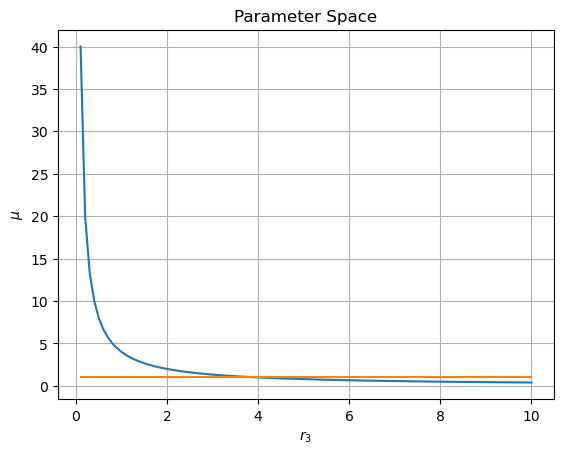

In [15]:
plt.figure(1)
plt.plot(r3_values_1, mu_values)
plt.plot(r3_values_1, r3_values_2)
plt.xlabel('$r_3$')
plt.ylabel('$\mu$')
plt.title('Parameter Space')
plt.grid(True)
plt.show()

## Question 1.7

Take sample points (4,10), (1,2), (1,0.5), (10,0.9).

In [16]:
jacobian_subs = A.subs([(k, 1), (I, 1), (T, 1), (kappa, 1), (r_3, 4), (mu, 10)])
display(jacobian_subs)

Matrix([
[0,    1,   0,  0],
[1,    0,   1,  0],
[0,    0,   0,  1],
[0, -160, -16, -8]])

In [17]:
char_eq.subs([(k, 1), (I, 1), (T, 1), (kappa, 1), (r_3, 4), (mu, 10)])

lambda**4 + 8*lambda**3 + 15*lambda**2 + 152*lambda - 16

(4,10) has an eigenvalue with a positive real part.

In [18]:
jacobian_subs = A.subs([(k, 1), (I, 1), (T, 1), (kappa, 1), (r_3, 1), (mu, 2)])
display(jacobian_subs)

Matrix([
[0,  1,  0,  0],
[1,  0,  1,  0],
[0,  0,  0,  1],
[0, -2, -1, -2]])

In [19]:
char_eq.subs([(k, 1), (I, 1), (T, 1), (kappa, 1), (r_3, 1), (mu, 2)])

lambda**4 + 2*lambda**3 - 1

(1,2) has an eigenvalue with a positive real part.

In [20]:
jacobian_subs = A.subs([(k, 1), (I, 1), (T, 1), (kappa, 1), (r_3, 1), (mu, 0.5)])
display(jacobian_subs)

Matrix([
[0,    1,  0,  0],
[1,    0,  1,  0],
[0,    0,  0,  1],
[0, -0.5, -1, -2]])

In [21]:
char_eq.subs([(k, 1), (I, 1), (T, 1), (kappa, 1), (r_3, 1), (mu, 0.5)])

lambda**4 + 2*lambda**3 - 1.5*lambda - 1

(1,0.5) has an eigenvalue with a positive real part.

In [22]:
jacobian_subs = A.subs([(k, 1), (I, 1), (T, 1), (kappa, 1), (r_3, 10), (mu, 0.9)])
display(jacobian_subs)

Matrix([
[0,     1,    0,   0],
[1,     0,    1,   0],
[0,     0,    0,   1],
[0, -90.0, -100, -20]])

In [23]:
char_eq.subs([(k, 1), (I, 1), (T, 1), (kappa, 1), (r_3, 10), (mu, 0.9)])

lambda**4 + 20*lambda**3 + 99*lambda**2 + 70.0*lambda - 100

(10,0.9) has an eigenvalue with a positive real part.

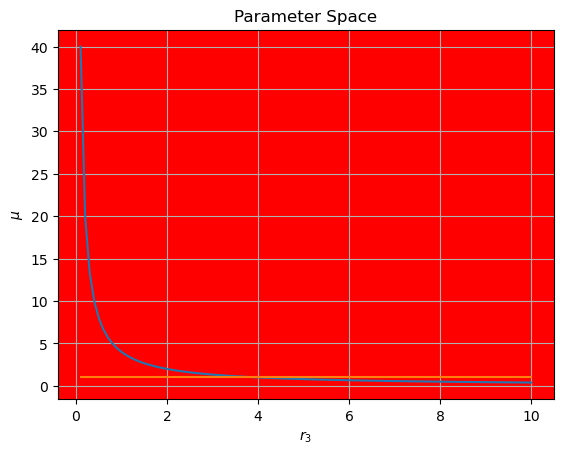

In [27]:
fig = plt.figure(2)
ax = plt.axes()
ax.set_facecolor("red")
plt.plot(r3_values_1, mu_values)
plt.plot(r3_values_1, r3_values_2)
plt.xlabel('$r_3$')
plt.ylabel('$\mu$')
plt.title('Parameter Space')
plt.grid(True)
plt.show()